# Preprocessing for Audio Data in Machine Learning 🎵🔊
#### Audio data preprocessing is crucial for machine learning models to extract meaningful features from raw sound signals. The goal is to convert waveforms into numerical representations that a model can effectively learn from.
#### 
#### 📌 Key Preprocessing Techniques for Audio Data
#### 1️⃣ Loading & Visualizing Audio Data
#### 2️⃣ Resampling & Mono Conversion
#### 3️⃣ Noise Reduction & Filtering
#### 4️⃣ Feature Extraction (MFCC, Spectrogram, Mel Spectrogram)
#### 5️⃣ Data Augmentation (Time Shifting, Pitch Shifting, etc.)
#### 
#### Let's go through each step with Python examples and comparisons.
#### 
#### 1️⃣ Loading & Visualizing Audio Data
#### 🔹 What is it?
#### Before preprocessing, we need to load the audio file and visualize its waveform.
#### 
#### 📌 Example: Load and Plot Audio


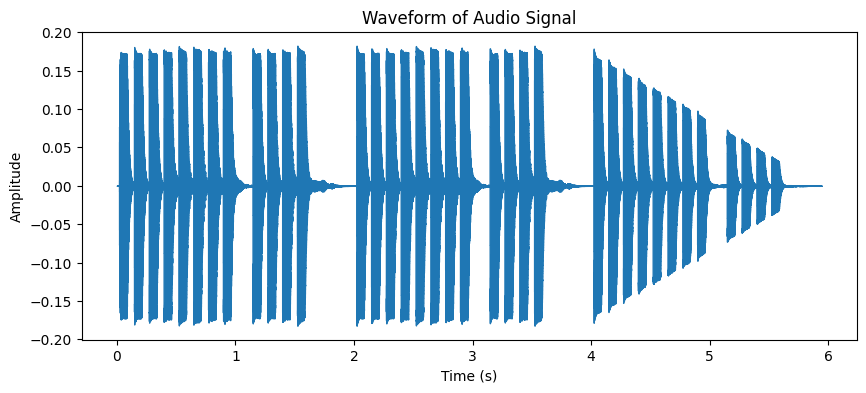

Sample Rate: 44100, Audio Duration: 5.94 sec


In [2]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file (default sampling rate is 22050 Hz)
audio_path = "sample.wav"
y, sr = librosa.load(audio_path, sr=None)  # Keep original sampling rate

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

print(f"Sample Rate: {sr}, Audio Duration: {len(y)/sr:.2f} sec")


####  📌 Why is this important?
####  ✅ Helps us understand the structure of the audio.
####  ✅ Lets us identify noise, distortions, or silence in the signal.
####  
####  2️⃣ Resampling & Mono Conversion
####  🔹 What is it?
####  Resampling: Converts an audio file to a consistent sample rate (e.g., 16kHz for speech models).
####  Mono Conversion: Converts stereo (2 channels) to mono (1 channel) for simpler processing.
####  📌 Example: Resample to 16kHz and Convert to Mono

In [3]:

# Resample to 16kHz
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=16000)

# Convert to mono (if stereo)
if len(y.shape) > 1:  
    y_mono = librosa.to_mono(y_resampled)
else:
    y_mono = y_resampled

print(f"New Sample Rate: 16000 Hz, New Length: {len(y_mono)/16000:.2f} sec")

New Sample Rate: 16000 Hz, New Length: 5.94 sec


#### 📌 Comparison of Resampling Methods
#### Method	Best for	Pros	Cons
#### Resampling	Standardizing datasets	Reduces file size, makes models consistent	May lose high-frequency details
#### Mono Conversion	Speech recognition	Simpler processing	Stereo information is lost
#### 3️⃣ Noise Reduction & Filtering
#### 🔹 What is it?
#### Removes background noise using techniques like spectral gating or bandpass filtering.
#### Improves speech recognition, music analysis, and emotion detection.
#### 📌 Example: Noise Reduction using Spectral Gating

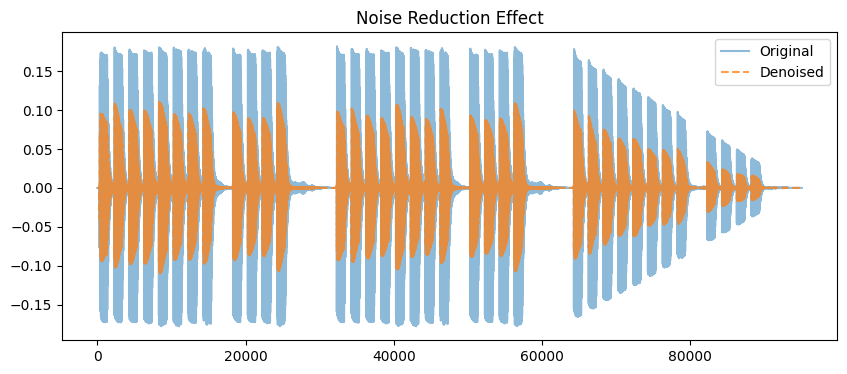

In [4]:
import noisereduce as nr

# Estimate noise from the first 1 second (assuming only noise present)
noise_sample = y_mono[:16000]  # First 1 second at 16kHz

# Apply noise reduction
y_denoised = nr.reduce_noise(y=y_mono, sr=16000, y_noise=noise_sample, prop_decrease=0.8)

# Compare original vs denoised waveforms
plt.figure(figsize=(10, 4))
plt.plot(y_mono, alpha=0.5, label="Original")
plt.plot(y_denoised, alpha=0.75, label="Denoised", linestyle="--")
plt.legend()
plt.title("Noise Reduction Effect")
plt.show()

#### 📌 Comparison of Noise Reduction Methods
#### Method	Best for	Pros	Cons
#### Spectral Gating	Speech, environmental sounds	Reduces background noise	May distort speech quality
#### Bandpass Filtering	Music processing	Keeps essential frequency range	Removes some useful details
#### 4️⃣ Feature Extraction
#### 🔹 What is it?
#### Raw waveforms are not directly useful for ML models. We extract features that represent meaningful audio characteristics.
#### 
#### Common Features
#### ✅ MFCC (Mel Frequency Cepstral Coefficients) – Used in speech & music classification
#### ✅ Spectrograms – Visual representation of frequencies over time
#### ✅ Mel Spectrogram – More human-like frequency perception
#### 
#### 📌 Example: MFCC Extraction


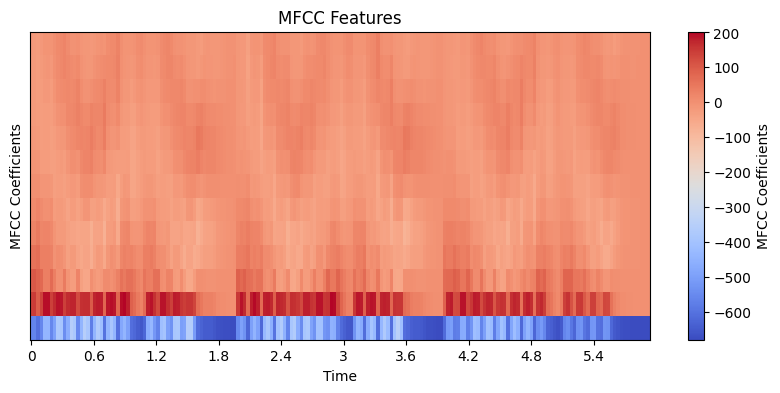

In [5]:

# Extract 13 MFCC features
mfccs = librosa.feature.mfcc(y=y_denoised, sr=16000, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=16000)
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCC Features")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()


#### 📌 Example: Spectrogram Extraction

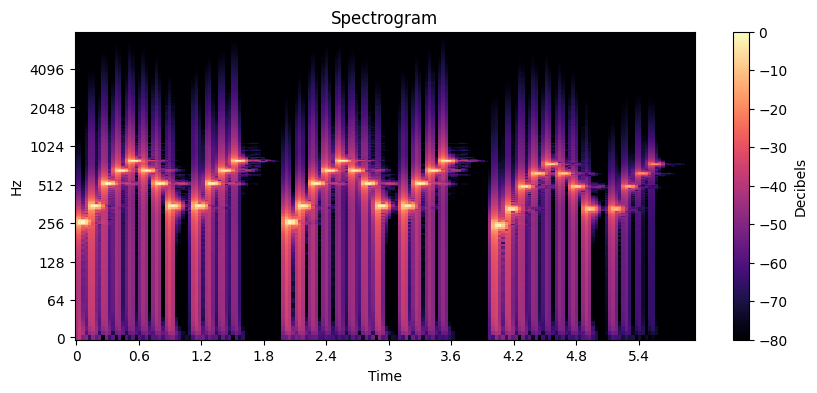

In [6]:
# Compute Short-Time Fourier Transform (STFT)
stft = np.abs(librosa.stft(y_denoised))

# Convert STFT to decibels (log scale)
spectrogram = librosa.amplitude_to_db(stft, ref=np.max)

# Plot Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=16000, x_axis="time", y_axis="log")
plt.colorbar(label="Decibels")
plt.title("Spectrogram")
plt.show()


#### 📌 Example: Mel Spectrogram Extraction


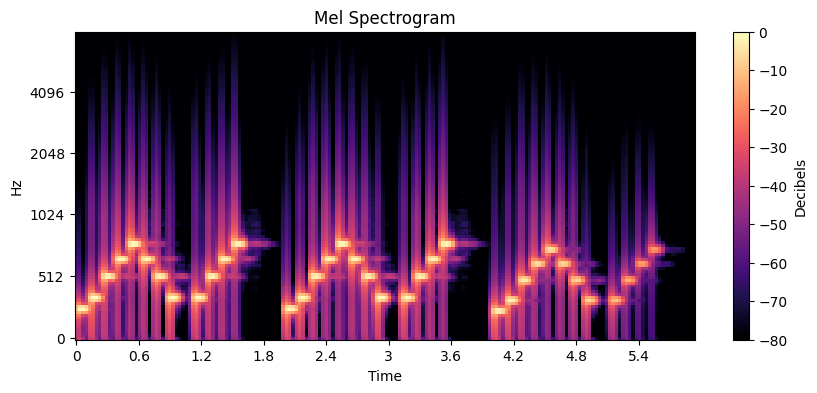

In [7]:

# Compute Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y_denoised, sr=16000, n_mels=128)

# Convert to log scale
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=16000, x_axis="time", y_axis="mel")
plt.colorbar(label="Decibels")
plt.title("Mel Spectrogram")
plt.show()



#### 📌 Comparison of Feature Extraction Methods
#### Method	Best for	Pros	Cons
#### MFCC	Speech recognition	Good at capturing phonetic structures	Ignores background noise
#### Spectrogram	Music & sound event detection	Rich time-frequency representation	Large storage size
#### Mel Spectrogram	General audio classification	Matches human hearing better	Computationally expensive
#### 5️⃣ Data Augmentation
#### 🔹 What is it?
#### Generates new variations of audio data to increase model robustness.
#### Used for speech recognition, music genre classification, and sound event detection.
#### Common Augmentations
#### ✅ Time Shifting – Moves the waveform left or right.
#### ✅ Pitch Shifting – Changes pitch without affecting speed.
#### ✅ Speed & Tempo Changes – Makes the model robust to speech variations.
#### 
#### 📌 Example: Time Shifting


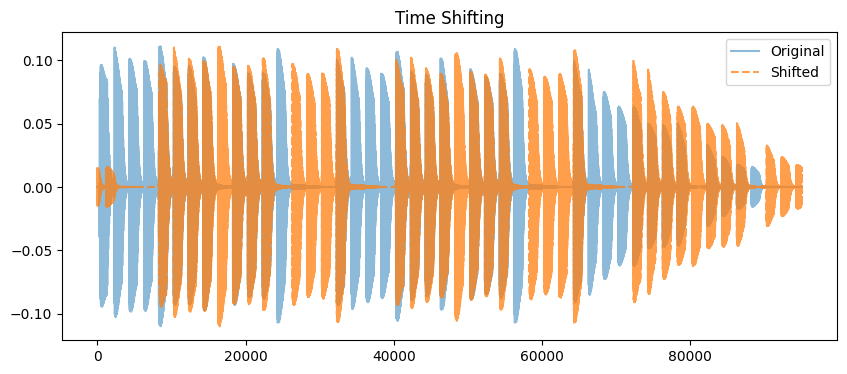

In [8]:

# Shift audio by 0.5 seconds (8000 samples at 16kHz)
shift = 8000
y_shifted = np.roll(y_denoised, shift)

plt.figure(figsize=(10, 4))
plt.plot(y_denoised, alpha=0.5, label="Original")
plt.plot(y_shifted, alpha=0.75, label="Shifted", linestyle="--")
plt.legend()
plt.title("Time Shifting")
plt.show()



#### Final Comparison Table
#### Technique	Purpose	Best for	Pros	Cons
#### Resampling	Standardizing sample rates	Speech, general audio	Reduces file size	Loss of high frequencies
#### Noise Reduction	Improving clarity	Noisy environments	Removes background noise	May alter voice
#### MFCC	Speech recognition	Voice classification	Compact representation	Ignores noise
#### Spectrogram	General audio	Sound event detection	Detailed analysis	Large size
#### Augmentation	Increasing dataset	Any ML model	Improves robustness	May introduce artifacts
#### Conclusion
#### 🔹 If working with speech recognition, use MFCC & noise reduction.
#### 🔹 If doing music analysis, use spectrograms & mel spectrograms.
#### 🔹 If you need more training data, apply data augmentation.
#### 


#### Advanced Audio Preprocessing: Pitch Shifting, Speed & Tempo Changes, Bandpass Filtering 🎵🎙️
#### In audio preprocessing, modifying pitch, speed, and filtering frequencies are crucial for data augmentation, noise reduction, and feature enhancement in speech recognition, music classification, and sound event detection.
#### 
#### 1️⃣ Pitch Shifting 🎶
#### 🔹 What is it?
#### Pitch shifting changes the pitch of an audio signal without affecting its speed. It is useful for:
#### 
#### Speech augmentation: Making models robust to different voices.
#### Music processing: Transposing notes while preserving rhythm.
#### Birdsong & sound event analysis: Standardizing frequencies.
#### 📌 Example: Pitch Shifting in Python

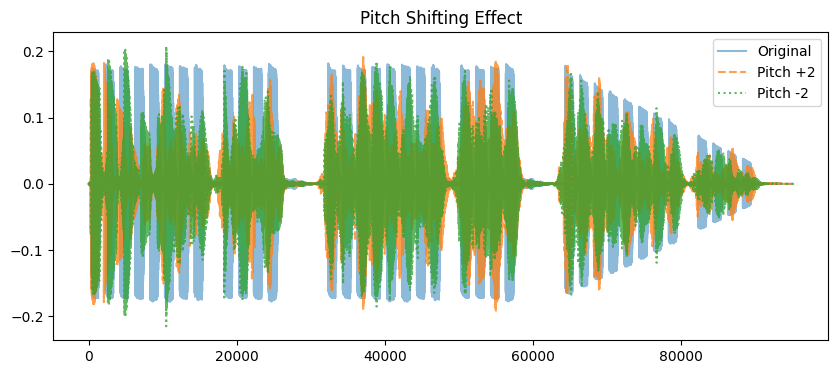

In [10]:

import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load("sample.wav", sr=16000)

# Apply pitch shift (+2 semitones)
y_pitch_up = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)

# Apply pitch shift (-2 semitones)
y_pitch_down = librosa.effects.pitch_shift(y, sr=sr, n_steps=-2)

# Plot waveforms
plt.figure(figsize=(10, 4))
plt.plot(y, alpha=0.5, label="Original")
plt.plot(y_pitch_up, alpha=0.75, label="Pitch +2", linestyle="--")
plt.plot(y_pitch_down, alpha=0.75, label="Pitch -2", linestyle=":")
plt.legend()
plt.title("Pitch Shifting Effect")
plt.show()


#### 📌 Pros & Cons of Pitch Shifting
#### Pros	Cons
#### Useful for speech augmentation	May introduce artifacts
#### Helps in music key changes	Can sound unnatural for extreme shifts
#### Preserves tempo and duration	Computationally expensive
#### 2️⃣ Speed & Tempo Changes 🏃‍♂️
#### 🔹 What is it?
#### Speed Change: Alters both pitch & duration.
#### Tempo Change: Alters speed but keeps pitch unchanged (useful for speech recognition).
#### 📌 Example: Speed Change (Modifies Pitch & Duration)


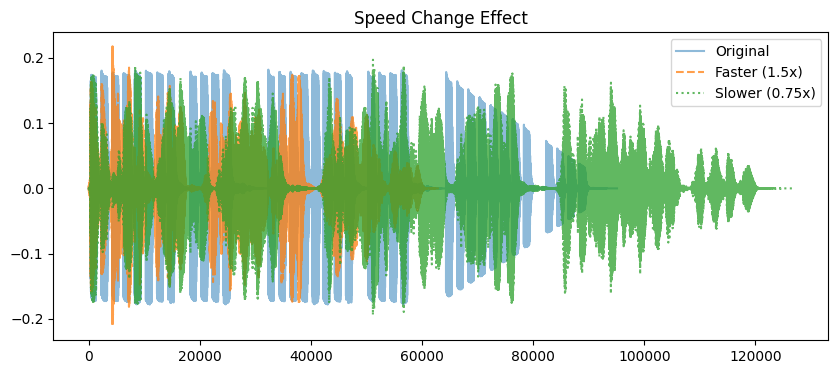

In [11]:

# Speed up audio (1.5x faster)
y_fast = librosa.effects.time_stretch(y, rate=1.5)

# Slow down audio (0.75x slower)
y_slow = librosa.effects.time_stretch(y, rate=0.75)

# Plot waveform comparison
plt.figure(figsize=(10, 4))
plt.plot(y, alpha=0.5, label="Original")
plt.plot(y_fast, alpha=0.75, label="Faster (1.5x)", linestyle="--")
plt.plot(y_slow, alpha=0.75, label="Slower (0.75x)", linestyle=":")
plt.legend()
plt.title("Speed Change Effect")
plt.show()

#### 📌 Example: Tempo Change (Keeps Pitch Constant)

In [12]:

import pyrubberband as pyrb  # Requires installation: pip install pyrubberband

# Change tempo to 1.5x without affecting pitch
y_tempo_up = pyrb.time_stretch(y, sr, rate=1.5)

# Change tempo to 0.75x without affecting pitch
y_tempo_down = pyrb.time_stretch(y, sr, rate=0.75)



#### 📌 Pros & Cons of Speed & Tempo Changes
#### Method	Changes	Best for	Pros	Cons
#### Speed Change	Alters pitch & duration	Data augmentation, music effects	Simple & fast	Sounds unnatural for speech
#### Tempo Change	Alters speed but keeps pitch	Speech recognition	More natural	Computationally expensive
#### 3️⃣ Bandpass Filtering 🎚️
#### 🔹 What is it?
#### A bandpass filter removes low and high frequencies, keeping only a selected frequency range.
#### 
#### 🛠️ Applications
#### ✅ Speech recognition (removes background noise)
#### ✅ Music analysis (filters out unwanted frequencies)
#### ✅ Biomedical signal processing (heart/lung sounds)
#### 
#### 📌 Example: Bandpass Filtering in Python
#### We use SciPy’s Butterworth filter to keep frequencies between 300 Hz – 3400 Hz (typical speech range).


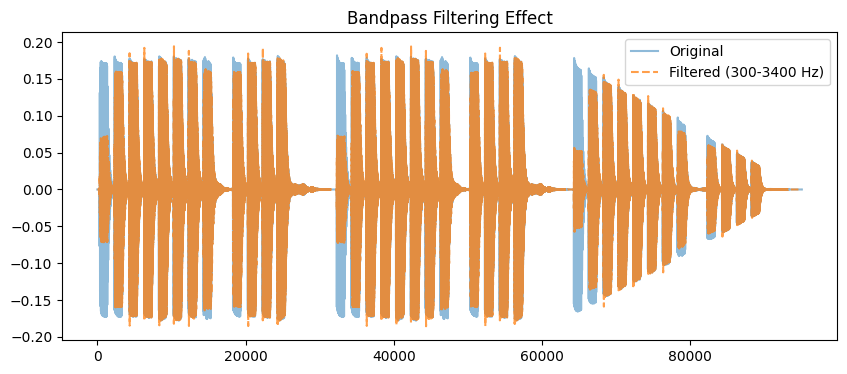

In [13]:
from scipy.signal import butter, lfilter

# Define Bandpass Filter
def butter_bandpass(lowcut, highcut, sr, order=5):
    nyq = 0.5 * sr  # Nyquist Frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply Bandpass Filter
def bandpass_filter(data, lowcut, highcut, sr, order=5):
    b, a = butter_bandpass(lowcut, highcut, sr, order=order)
    y_filtered = lfilter(b, a, data)
    return y_filtered

# Apply the filter (Keep 300Hz-3400Hz for speech processing)
y_filtered = bandpass_filter(y, lowcut=300, highcut=3400, sr=sr)

# Plot comparison
plt.figure(figsize=(10, 4))
plt.plot(y, alpha=0.5, label="Original")
plt.plot(y_filtered, alpha=0.75, label="Filtered (300-3400 Hz)", linestyle="--")
plt.legend()
plt.title("Bandpass Filtering Effect")
plt.show()


#### 📌 Comparison of Filters
#### Filter	Best for	Pros	Cons
#### Low-pass (Keeps low frequencies)	Bass extraction, removing high noise	Removes high-pitched noise	Loses high-frequency details
#### High-pass (Keeps high frequencies)	Removing background hum	Removes low-frequency noise	Distorts voice clarity
#### Bandpass (Keeps a range of frequencies)	Speech processing, music filtering	Removes unwanted frequencies	May cut useful sounds
#### Final Summary
#### Method	Best for	Pros	Cons
#### Pitch Shifting	Speech augmentation, music transposition	Preserves duration	Can sound unnatural
#### Speed Change	Music & speech data augmentation	Fast, simple	Alters pitch
#### Tempo Change	Speech recognition, audio classification	Keeps pitch	Computationally expensive
#### Bandpass Filtering	Noise removal, speech enhancement	Removes unwanted noise	May cut useful frequencies
#### 🎯 Key Takeaways
#### Pitch shifting is useful for voice augmentation & music transposition.
#### Speed & tempo changes help in data augmentation & speech adaptation.
#### Bandpass filtering is great for noise removal & feature enhancement.
#### Would you like to apply these techniques in Deep Learning models? 🚀

#### 📌 Comparison of Noise Reduction Methods
#### Method	Best for	Pros	Cons
#### Spectral Gating	Speech, environmental sounds	Reduces background noise	May distort speech quality
#### Bandpass Filtering	Music processing	Keeps essential frequency range	Removes some useful details
#### 4️⃣
####  Feature Extraction
#### 🔹 What is it?
#### Raw waveforms are not directly useful for ML models. We extract features that represent meaningful audio characteristics.
#### Common Features
#### 
#### ✅ MFCC (Mel Frequency Cepstral Coefficients) – Used in speech & music classification
#### ✅ Spectrograms – Visual representation of frequencies over time
#### ✅ Mel Spectrogram – More human-like frequency perception
#### 📌 Example: MFCC Extraction

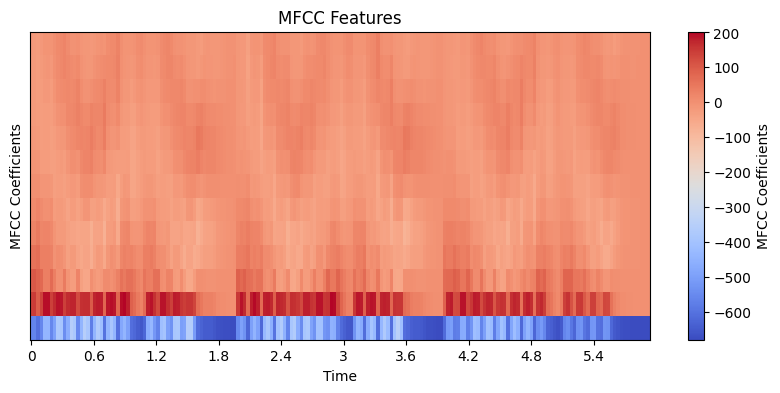

In [14]:
# Extract 13 MFCC features
mfccs = librosa.feature.mfcc(y=y_denoised, sr=16000, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=16000)
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCC Features")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

#### 📌 Example: Spectrogram Extraction

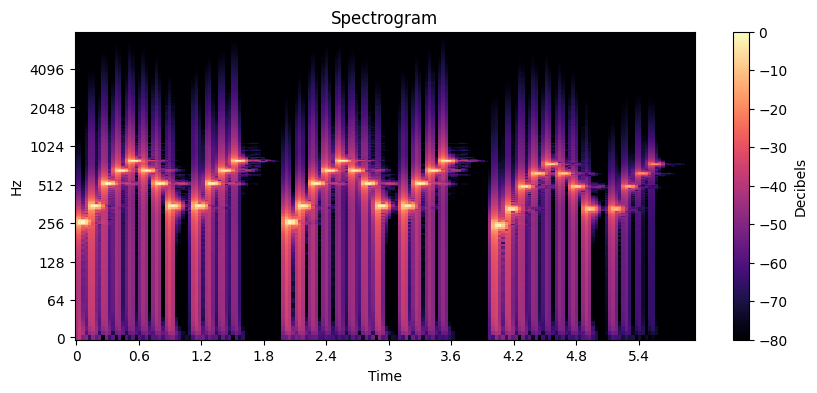

In [15]:

# Compute Short-Time Fourier Transform (STFT)
stft = np.abs(librosa.stft(y_denoised))

# Convert STFT to decibels (log scale)
spectrogram = librosa.amplitude_to_db(stft, ref=np.max)

# Plot Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=16000, x_axis="time", y_axis="log")
plt.colorbar(label="Decibels")
plt.title("Spectrogram")
plt.show()


#### 📌 Example: Mel Spectrogram Extraction


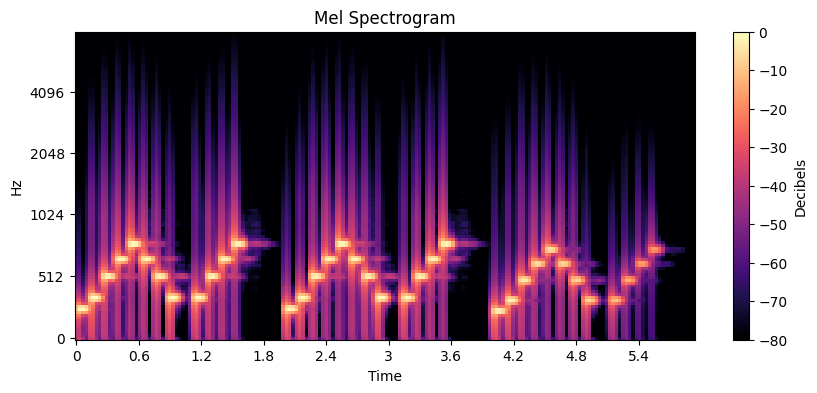

In [16]:
# Compute Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y_denoised, sr=16000, n_mels=128)

# Convert to log scale
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=16000, x_axis="time", y_axis="mel")
plt.colorbar(label="Decibels")
plt.title("Mel Spectrogram")
plt.show()


#### 📌 Comparison of Feature Extraction Methods
#### Method	Best for	Pros	Cons
#### MFCC	Speech recognition	Good at capturing phonetic structures	Ignores background noise
#### Spectrogram	Music & sound event detection	Rich time-frequency representation	Large storage size
#### Mel Spectrogram	General audio classification	Matches human hearing better	Computationally expensive
#### 5️⃣ Data Augmentation
#### 🔹 What is it?
#### Generates new variations of audio data to increase model robustness.
#### Used for speech recognition, music genre classification, and sound event detection.
#### Common Augmentations
#### ✅ Time Shifting – Moves the waveform left or right.
#### ✅ Pitch Shifting – Changes pitch without affecting speed.
#### ✅ Speed & Tempo Changes – Makes the model robust to speech variations.
#### 
#### 📌 Example: Time Shifting

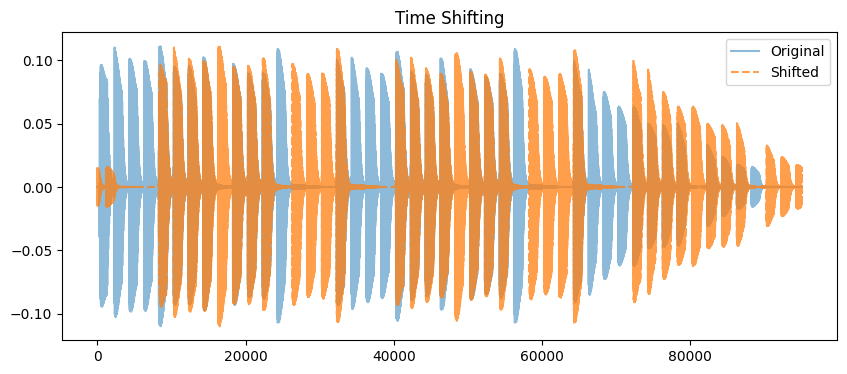

In [17]:

# Shift audio by 0.5 seconds (8000 samples at 16kHz)
shift = 8000
y_shifted = np.roll(y_denoised, shift)

plt.figure(figsize=(10, 4))
plt.plot(y_denoised, alpha=0.5, label="Original")
plt.plot(y_shifted, alpha=0.75, label="Shifted", linestyle="--")
plt.legend()
plt.title("Time Shifting")
plt.show()


#### Final Comparison Table
#### Technique	Purpose	Best for	Pros	Cons
#### Resampling	Standardizing sample rates	Speech, general audio	Reduces file size	Loss of high frequencies
#### Noise Reduction	Improving clarity	Noisy environments	Removes background noise	May alter voice
#### MFCC	Speech recognition	Voice classification	Compact representation	Ignores noise
#### Spectrogram	General audio	Sound event detection	Detailed analysis	Large size
#### Augmentation	Increasing dataset	Any ML model	Improves robustness	May introduce artifacts
#### Conclusion
#### 🔹 If working with speech recognition, use MFCC & noise reduction.
#### 🔹 If doing music analysis, use spectrograms & mel spectrograms.
#### 🔹 If you need more training data, apply data augmentation.


#### Advanced Audio Preprocessing: Pitch Shifting, Speed & Tempo Changes, Bandpass Filtering 🎵🎙️
#### In audio preprocessing, modifying pitch, speed, and filtering frequencies are crucial for data augmentation, noise reduction, and feature enhancement in speech recognition, music classification, and sound event detection.
#### 
#### 1️⃣ Pitch Shifting 🎶
#### 🔹 What is it?
#### Pitch shifting changes the pitch of an audio signal without affecting its speed. It is useful for:
#### 
#### Speech augmentation: Making models robust to different voices.
#### Music processing: Transposing notes while preserving rhythm.
#### Birdsong & sound event analysis: Standardizing frequencies.
#### 📌 Example: Pitch Shifting in Python

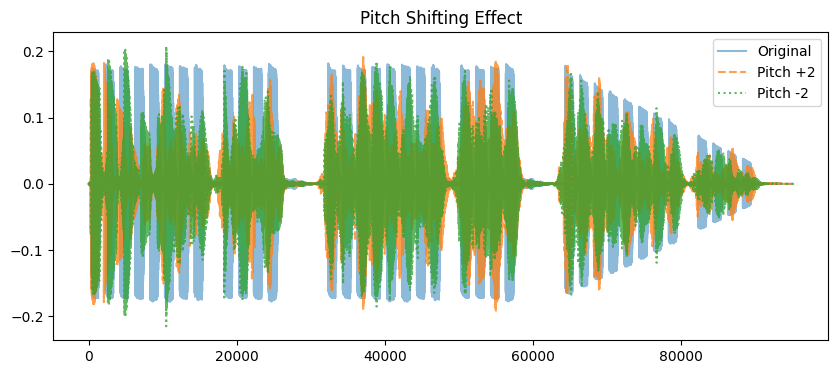

In [19]:

import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load("sample.wav", sr=16000)

# Apply pitch shift (+2 semitones)
y_pitch_up = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)

# Apply pitch shift (-2 semitones)
y_pitch_down = librosa.effects.pitch_shift(y, sr=sr, n_steps=-2)

# Plot waveforms
plt.figure(figsize=(10, 4))
plt.plot(y, alpha=0.5, label="Original")
plt.plot(y_pitch_up, alpha=0.75, label="Pitch +2", linestyle="--")
plt.plot(y_pitch_down, alpha=0.75, label="Pitch -2", linestyle=":")
plt.legend()
plt.title("Pitch Shifting Effect")
plt.show()


#### 📌 Pros & Cons of Pitch Shifting
#### Pros	Cons
#### Useful for speech augmentation	May introduce artifacts
#### Helps in music key changes	Can sound unnatural for extreme shifts
#### Preserves tempo and duration	Computationally expensive
#### 2️⃣ Speed & Tempo Changes 🏃‍♂️
#### 🔹 What is it?
#### Speed Change: Alters both pitch & duration.
#### Tempo Change: Alters speed but keeps pitch unchanged (useful for speech recognition).
#### 📌 Example: Speed Change (Modifies Pitch & Duration)

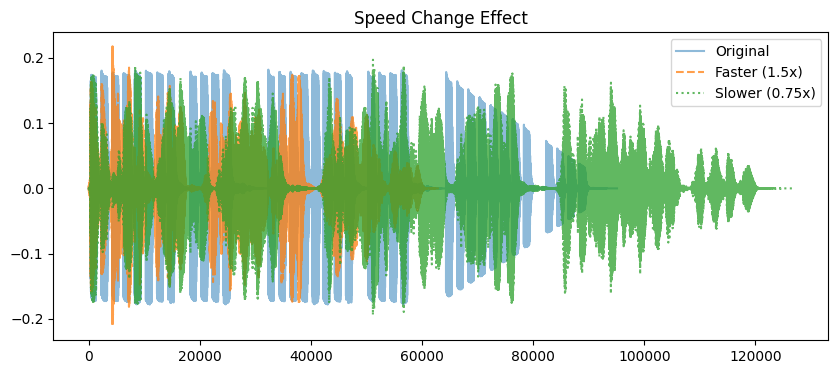

In [20]:

# Speed up audio (1.5x faster)
y_fast = librosa.effects.time_stretch(y, rate=1.5)

# Slow down audio (0.75x slower)
y_slow = librosa.effects.time_stretch(y, rate=0.75)

# Plot waveform comparison
plt.figure(figsize=(10, 4))
plt.plot(y, alpha=0.5, label="Original")
plt.plot(y_fast, alpha=0.75, label="Faster (1.5x)", linestyle="--")
plt.plot(y_slow, alpha=0.75, label="Slower (0.75x)", linestyle=":")
plt.legend()
plt.title("Speed Change Effect")
plt.show()


#### 📌 Example: Tempo Change (Keeps Pitch Constant)

In [21]:

import pyrubberband as pyrb  # Requires installation: pip install pyrubberband

# Change tempo to 1.5x without affecting pitch
y_tempo_up = pyrb.time_stretch(y, sr, rate=1.5)

# Change tempo to 0.75x without affecting pitch
y_tempo_down = pyrb.time_stretch(y, sr, rate=0.75)



#### 📌 Pros & Cons of Speed & Tempo Changes
#### Method	Changes	Best for	Pros	Cons
#### Speed Change	Alters pitch & duration	Data augmentation, music effects	Simple & fast	Sounds unnatural for speech
#### Tempo Change	Alters speed but keeps pitch	Speech recognition	More natural	Computationally expensive
#### 3️⃣ Bandpass Filtering 🎚️
#### 🔹 What is it?
#### A bandpass filter removes low and high frequencies, keeping only a selected frequency range.
#### 
#### 🛠️ Applications
#### ✅ Speech recognition (removes background noise)
#### ✅ Music analysis (filters out unwanted frequencies)
#### ✅ Biomedical signal processing (heart/lung sounds)
#### 
#### 📌 Example: Bandpass Filtering in Python
#### We use SciPy’s Butterworth filter to keep frequencies between 300 Hz – 3400 Hz (typical speech range).


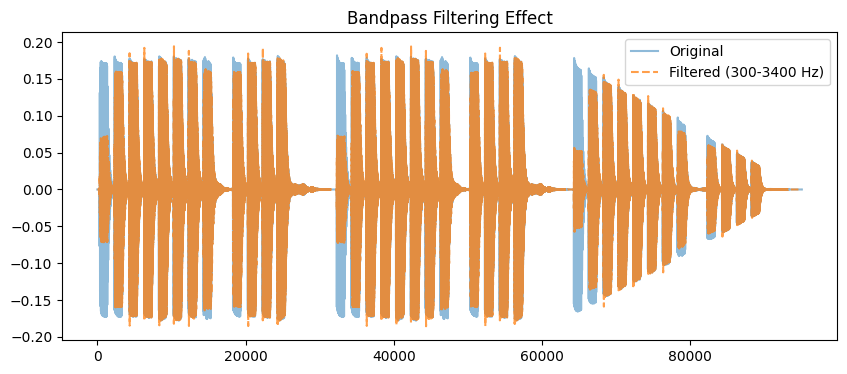

In [22]:

from scipy.signal import butter, lfilter

# Define Bandpass Filter
def butter_bandpass(lowcut, highcut, sr, order=5):
    nyq = 0.5 * sr  # Nyquist Frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply Bandpass Filter
def bandpass_filter(data, lowcut, highcut, sr, order=5):
    b, a = butter_bandpass(lowcut, highcut, sr, order=order)
    y_filtered = lfilter(b, a, data)
    return y_filtered

# Apply the filter (Keep 300Hz-3400Hz for speech processing)
y_filtered = bandpass_filter(y, lowcut=300, highcut=3400, sr=sr)

# Plot comparison
plt.figure(figsize=(10, 4))
plt.plot(y, alpha=0.5, label="Original")
plt.plot(y_filtered, alpha=0.75, label="Filtered (300-3400 Hz)", linestyle="--")
plt.legend()
plt.title("Bandpass Filtering Effect")
plt.show()


#### 📌 Comparison of Filters
#### Filter	Best for	Pros	Cons
#### Low-pass (Keeps low frequencies)	Bass extraction, removing high noise	Removes high-pitched noise	Loses high-frequency details
#### High-pass (Keeps high frequencies)	Removing background hum	Removes low-frequency noise	Distorts voice clarity
#### Bandpass (Keeps a range of frequencies)	Speech processing, music filtering	Removes unwanted frequencies	May cut useful sounds
#### Final Summary
#### Method	Best for	Pros	Cons
#### Pitch Shifting	Speech augmentation, music transposition	Preserves duration	Can sound unnatural
#### Speed Change	Music & speech data augmentation	Fast, simple	Alters pitch
#### Tempo Change	Speech recognition, audio classification	Keeps pitch	Computationally expensive
#### Bandpass Filtering	Noise removal, speech enhancement	Removes unwanted noise	May cut useful frequencies
#### 🎯 Key Takeaways
#### Pitch shifting is useful for voice augmentation & music transposition.
#### Speed & tempo changes help in data augmentation & speech adaptation.
#### Bandpass filtering is great for noise removal & feature enhancement.
#### Would you like to apply these techniques in Deep Learning models? 🚀

In [23]:

import pyrubberband as pyrb  # Requires installation: pip install pyrubberband

# Change tempo to 1.5x without affecting pitch
y_tempo_up = pyrb.time_stretch(y, sr, rate=1.5)

# Change tempo to 0.75x without affecting pitch
y_tempo_down = pyrb.time_stretch(y, sr, rate=0.75)


#### 📌 Pros & Cons of Speed & Tempo Changes
#### Method	Changes	Best for	Pros	Cons
#### Speed Change	Alters pitch & duration	Data augmentation, music effects	Simple & fast	Sounds unnatural for speech
#### Tempo Change	Alters speed but keeps pitch	Speech recognition	More natural	Computationally expensive
#### 3️⃣ Bandpass Filtering 🎚️
#### 🔹 What is it?
#### A bandpass filter removes low and high frequencies, keeping only a selected frequency range.
#### 
#### 🛠️ Applications
#### ✅ Speech recognition (removes background noise)
#### ✅ Music analysis (filters out unwanted frequencies)
#### ✅ Biomedical signal processing (heart/lung sounds)
#### 
#### 📌 Example: Bandpass Filtering in Python
#### We use SciPy’s Butterworth filter to keep frequencies between 300 Hz – 3400 Hz (typical speech range).



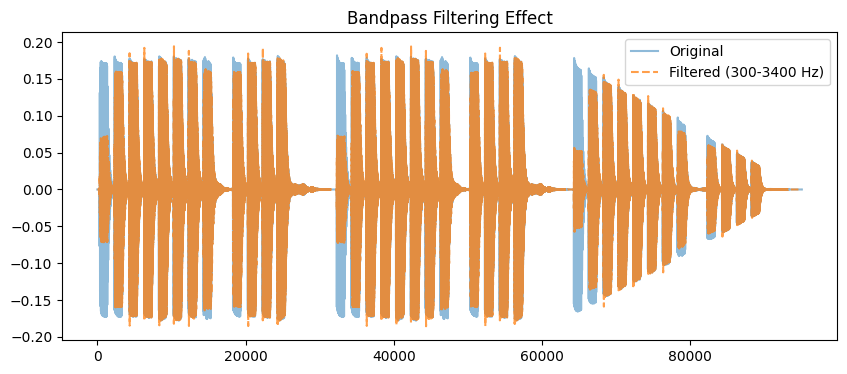

In [24]:

from scipy.signal import butter, lfilter

# Define Bandpass Filter
def butter_bandpass(lowcut, highcut, sr, order=5):
    nyq = 0.5 * sr  # Nyquist Frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply Bandpass Filter
def bandpass_filter(data, lowcut, highcut, sr, order=5):
    b, a = butter_bandpass(lowcut, highcut, sr, order=order)
    y_filtered = lfilter(b, a, data)
    return y_filtered

# Apply the filter (Keep 300Hz-3400Hz for speech processing)
y_filtered = bandpass_filter(y, lowcut=300, highcut=3400, sr=sr)

# Plot comparison
plt.figure(figsize=(10, 4))
plt.plot(y, alpha=0.5, label="Original")
plt.plot(y_filtered, alpha=0.75, label="Filtered (300-3400 Hz)", linestyle="--")
plt.legend()
plt.title("Bandpass Filtering Effect")
plt.show()



#### 📌 Comparison of Filters
#### Filter	Best for	Pros	Cons
#### Low-pass (Keeps low frequencies)	Bass extraction, removing high noise	Removes high-pitched noise	Loses high-frequency details
#### High-pass (Keeps high frequencies)	Removing background hum	Removes low-frequency noise	Distorts voice clarity
#### Bandpass (Keeps a range of frequencies)	Speech processing, music filtering	Removes unwanted frequencies	May cut useful sounds
#### Final Summary
#### Method	Best for	Pros	Cons
#### Pitch Shifting	Speech augmentation, music transposition	Preserves duration	Can sound unnatural
#### Speed Change	Music & speech data augmentation	Fast, simple	Alters pitch
#### Tempo Change	Speech recognition, audio classification	Keeps pitch	Computationally expensive
#### Bandpass Filtering	Noise removal, speech enhancement	Removes unwanted noise	May cut useful frequencies
#### 🎯 Key Takeaways
#### Pitch shifting is useful for voice augmentation & music transposition.
#### Speed & tempo changes help in data augmentation & speech adaptation.
#### Bandpass filtering is great for noise removal & feature enhancement.
#### Would you like to apply these techniques in Deep Learning models? 🚀